<h2><center> Лабораторна робота №1 </center></h2>
<h2><center> Попередня обробка
зображень. </center></h2>
<h2><center> З дисципліни Обробка зображень методами штучного інтелекту </center></h2>

__Виконав:__
студент групи КН-414
Оренчук Олег

__Викладач:__ Пелешко Д.Д.

## Завдання
### Варіант №15
* Виконати детекцію границь на зображеннях за допомогою операторів Kirsch,
Laplacian. 
* Провести порівняльний аналіз.


In [19]:
from PIL import Image
import numpy as np

## Завантаження зображення

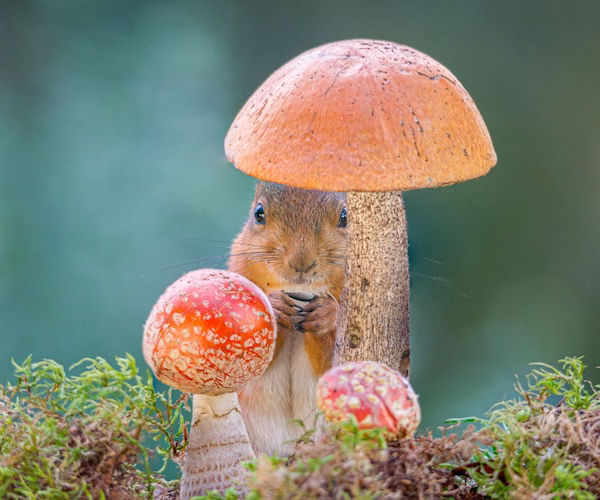

In [20]:
im = Image.open("drive/MyDrive/CV/mushroom.jpg")
# im = Image.open("drive/MyDrive/CV/fox.jpg")
# im = Image.open("drive/MyDrive/CV/dragon.jpg")
# im = Image.open("drive/MyDrive/CV/panda.jpg")
im.show()


## Конвертування зображення у відтінки сірого та збереження його як масиву numpy

In [21]:
im_gray = im.convert('L')
im_arr = np.array(im_gray)

## Визначення вагових коефіцієнтів для оператора Kirsch'а та Laplacian'а

In [22]:
kernels_kirsch = [
np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
]
kernel_laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

## Застосування оператора Kirsch до зображення та збереження результату як нового зображення

In [23]:
result_kirsch = np.zeros_like(im_arr)
for i in range(1, im_arr.shape[0]-1):
  for j in range(1, im_arr.shape[1]-1):
    max_val = 0
    for kernel in kernels_kirsch:
      val = np.sum(np.abs(kernel * im_arr[i-1:i+2, j-1:j+2]))
      if val > max_val:
        max_val = val
      result_kirsch[i, j] = max_val

im_kirsch = Image.fromarray(result_kirsch.astype(np.uint8))

## Застосування оператора Laplacian до зображення та збереження результату як нового зображення

In [24]:
result_laplacian = np.zeros_like(im_arr)

for i in range(1, im_arr.shape[0]-1):
  for j in range(1, im_arr.shape[1]-1):
    val = np.sum(kernel_laplacian * im_arr[i-1:i+2, j-1:j+2])
    result_laplacian[i, j] = np.abs(val)

im_laplacian = Image.fromarray(result_laplacian.astype(np.uint8))

## Об'єднуємо по горизонталі оригінальне зображення, зображення з оператором Кірша та зображення з оператором Лапласа

In [25]:
result_concatenated = np.hstack((im_arr, result_kirsch, result_laplacian))
result_concatenated = result_concatenated.astype(np.uint8)
im_concatenated = Image.fromarray(result_concatenated)

## Виводимо об'єднане зображення

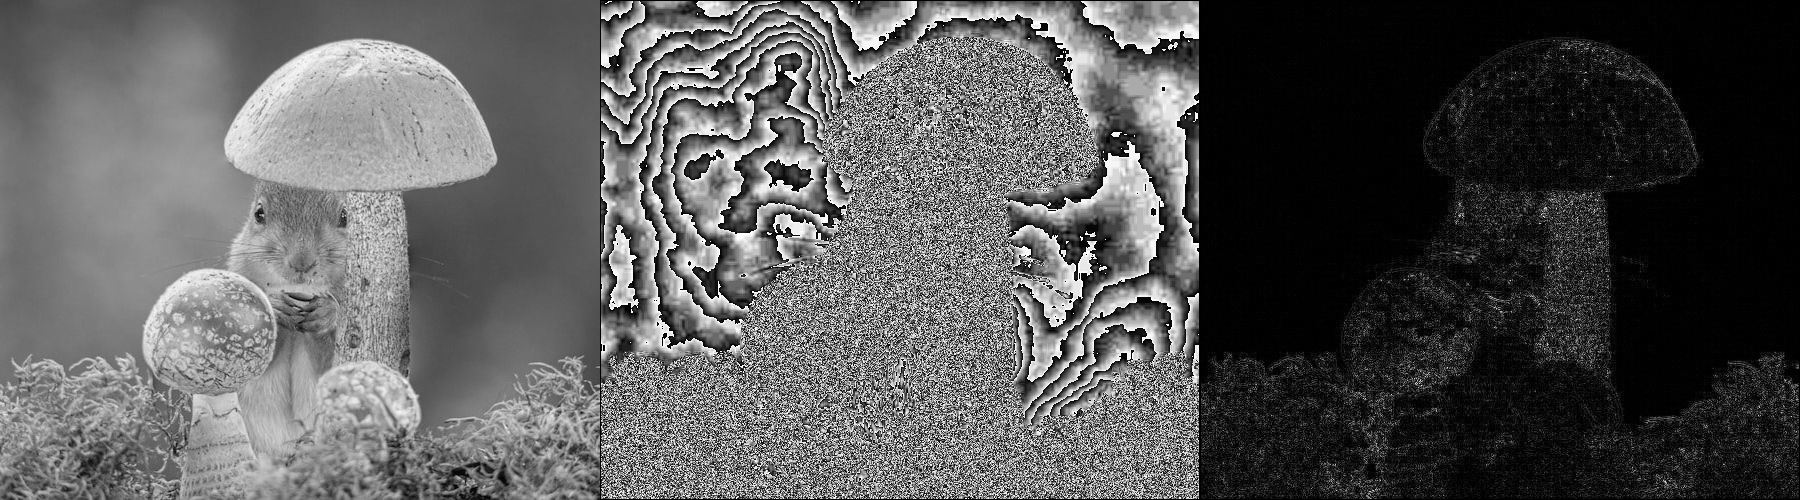

In [26]:
im_concatenated.show()